Dataset: Jogadores da Liga Alemã de Futebol (Bundesliga).

Importando Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import textwrap

Importando dataset com Pandas

In [2]:
dados = pd.read_csv("bundesliga_players.csv");

Criação do gráfico de barras

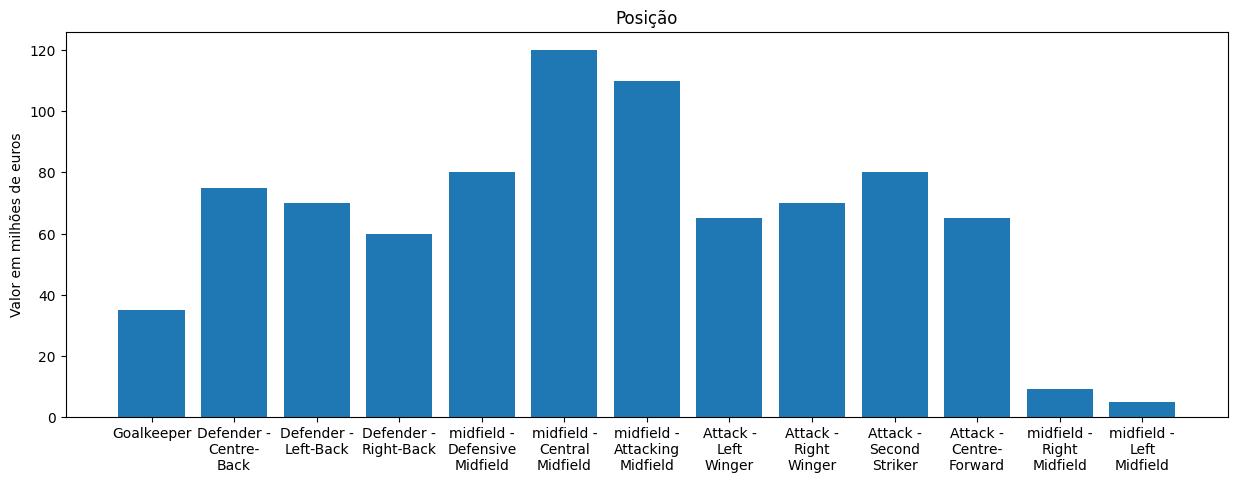

In [10]:
# Quebrar linha em posições que tem mais de 1 palavra (A cada 10 letras quebra linha).
rotulos_quebrados = [textwrap.fill(pos, 10) for pos in dados['position']]

#Criação do gráfico

plt.figure(figsize=(15,5))
plt.bar(rotulos_quebrados, dados['price']);
plt.ylabel('Valor em milhões de euros');
plt.title('Posição')
plt.show();

Gráfico de Setores (Pizza)

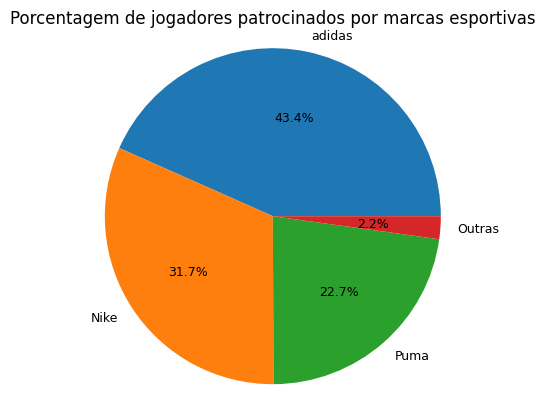

In [9]:
## Agrupando o número de dados pela coluna "outfitter" (marca) e contando quantos tem de cada;
agrupado = dados['outfitter'].value_counts()

## Somando porcentagem das categorias
total = agrupado.sum()
porcentagens = agrupado / total * 100

## Identificando as categorias com porcentagens inferiores a 2%:
categorias_outras = porcentagens[porcentagens < 2].index

## Combinando as categorias menores que 2% em uma única categoria chamada "outras":
agrupado.loc[categorias_outras] = porcentagens[categorias_outras].sum()
agrupado = agrupado.drop(categorias_outras)
agrupado['Outras'] = porcentagens[categorias_outras].sum()

# Criando o gráfico Pie

agrupado.plot.pie(autopct='%1.1f%%', fontsize=9)


plt.axis('equal')
plt.title('Porcentagem de jogadores patrocinados por marcas esportivas', fontsize=12)
plt.ylabel('')
plt.show();


Gráfico Geográfico

In [17]:
import plotly as py
import plotly.graph_objects as go

## Pegando apenas a primeira palavra do campo nacionalidade, em alguns casos jogadores possuem dupla nacionalidade,
##  mas só nos interessa o país de nascimento. Pegando apenas jogadores que não nasceram na alemanha
dados['nationality'] = dados['nationality'].str.split().str[0]
nationality_ext = dados.query('nationality != "Germany"')

locations = nationality_ext['nationality'].unique()
z = np.zeros_like(locations)

for i in range(locations.size):
    z[i] = np.sum(nationality_ext['age'][nationality_ext['nationality'] == locations[i]])

data = dict(
    type='choropleth',
    locations=nationality_ext['nationality'].unique(),
    locationmode='country names',
    colorscale=['#09edcf', '#35708f', '#0d384f'],
    z=z,
    zmin=20,  # Valor mínimo para a escala de cores
    zmax=300  # Valor máximo para a escala de cores
)

map = go.Figure(data=[data])
map.update_layout(
    title={
        'text': 'Jogadores estrangeiros por país',
        'x': 0.5,  # Centralizar horizontalmente
        },  
        yaxis=dict(
            tickmode='array',
            tickvals=[20, 40, 60, 80, 100, 120, 140],  # Valores específicos para os marcadores de escala no eixo y
    ),
    width=800,
    height=600,  

)
map.show()


In [18]:
import plotly.express as px

# Agrupar os dados por nacionalidade e local de nascimento, concatenando os nomes para aparecer no hover.
grouped_data = dados.groupby(['nationality', 'place_of_birth'])['name'].agg(', '.join).reset_index(name='names')

# Calcular a contagem de nomes em cada grupo
grouped_data['count'] = grouped_data['names'].apply(lambda x: len(x.split(', ')))

# Criar o gráfico de treemap
fig = px.treemap(grouped_data, path=['nationality', 'place_of_birth'], values='count', labels={'count': 'Total'}, hover_data=['names'])

fig.update_layout(
    width=1300, 
    height=800,  
    margin=dict(l=20),
     title={
        'text': 'Quantidade de jogadores por cidade',
        'x': 0.5,  # Centralizar horizontalmente
    },
)
# Exibir o gráfico
fig.show()
